# 개별 코드 

In [1]:
# 랜덤 시드 설정
import numpy as np
import tensorflow as tf

np.random.seed(0)
tf.random.set_seed(0)

In [2]:
# 데이터 불러오기
from sklearn import datasets

raw_boston = datasets.load_boston()

In [3]:
# 피쳐, 타겟 데이터 지정
X = raw_boston.data
y = raw_boston.target

In [4]:
# 피쳐 데이터 차원 확인
print(X.shape)

(506, 13)


In [5]:
# 타겟 데이터 종류 확인
print(set(y))

{5.0, 6.3, 7.2, 8.8, 7.4, 10.2, 11.8, 12.7, 13.6, 14.5, 15.0, 16.5, 17.5, 18.9, 18.2, 20.4, 21.6, 22.9, 21.7, 24.0, 19.9, 26.6, 26.5, 27.5, 23.1, 27.1, 28.7, 24.7, 30.8, 33.4, 34.7, 34.9, 36.2, 35.4, 31.6, 33.0, 38.7, 33.2, 43.8, 41.3, 37.2, 39.8, 42.3, 48.5, 44.8, 50.0, 46.7, 48.3, 44.0, 48.8, 46.0, 10.5, 11.5, 11.0, 12.5, 12.0, 13.5, 13.0, 14.0, 16.6, 16.0, 16.1, 16.4, 17.4, 17.1, 17.0, 17.6, 17.9, 18.4, 18.6, 18.5, 18.0, 18.1, 19.6, 19.4, 19.5, 19.1, 19.0, 20.0, 20.5, 20.9, 20.6, 20.1, 21.0, 21.4, 21.5, 21.9, 21.1, 22.0, 22.5, 22.6, 22.4, 22.1, 23.4, 23.5, 23.9, 23.6, 23.0, 24.1, 24.6, 24.4, 24.5, 25.0, 25.1, 26.4, 27.0, 27.9, 28.0, 28.4, 28.1, 28.5, 28.6, 29.4, 29.9, 29.6, 29.1, 29.0, 30.5, 30.1, 31.1, 31.5, 31.0, 32.5, 32.0, 32.9, 32.4, 32.2, 33.3, 33.8, 33.1, 32.7, 8.4, 34.6, 35.2, 35.1, 10.4, 10.9, 7.0, 36.4, 36.0, 36.5, 36.1, 11.9, 37.9, 37.0, 37.6, 37.3, 13.9, 13.4, 14.4, 14.9, 15.4, 8.5, 41.7, 42.8, 43.1, 43.5, 45.4, 9.5, 8.3, 8.7, 9.7, 10.8, 11.3, 11.7, 12.3, 12.8, 13.2, 13.

In [6]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split

X_tn, X_te, y_tn, y_te=train_test_split(X, y, random_state=0)

In [7]:
# 신경망 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

n_feat = X_tn.shape[1]
epo = 30

model = Sequential()
model.add(Dense(20, input_dim=n_feat, activation='relu'))
model.add(Dense(1))

In [8]:
# 모형 컴파일
model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['mean_squared_error'])

In [9]:
# 신경망 학습
hist = model.fit(X_tn, y_tn, epochs=epo, batch_size=5)

Epoch 1/30
76/76 [==============================] - 0s 601us/step - loss: 474.8179 - mean_squared_error: 474.8179
Epoch 2/30
76/76 [==============================] - 0s 561us/step - loss: 97.4737 - mean_squared_error: 97.4737
Epoch 3/30
76/76 [==============================] - 0s 574us/step - loss: 81.1661 - mean_squared_error: 81.1661
Epoch 4/30
76/76 [==============================] - 0s 574us/step - loss: 72.6058 - mean_squared_error: 72.6058
Epoch 5/30
76/76 [==============================] - 0s 574us/step - loss: 63.1071 - mean_squared_error: 63.1071
Epoch 6/30
76/76 [==============================] - 0s 561us/step - loss: 57.3056 - mean_squared_error: 57.3056
Epoch 7/30
76/76 [==============================] - 0s 574us/step - loss: 53.3248 - mean_squared_error: 53.3248
Epoch 8/30
76/76 [==============================] - 0s 561us/step - loss: 48.0305 - mean_squared_error: 48.0305
Epoch 9/30
76/76 [==============================] - 0s 574us/step - loss: 44.4123 - mean_squared_error

In [10]:
# 트레이닝 데이터 평가
print(model.evaluate(X_tn, y_tn)[1])

12/12 [==============================] - 0s 637us/step - loss: 51.5558 - mean_squared_error: 51.5558
51.55579376220703


In [11]:
# 테스트 데이터 평가
print(model.evaluate(X_te, y_te)[1])

4/4 [==============================] - 0s 1ms/step - loss: 73.9726 - mean_squared_error: 73.9726
73.97261810302734


In [12]:
import numpy as np

epoch = np.arange(1,epo+1)
print(epoch)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [13]:
mse = hist.history['mean_squared_error'] 
print(mse)

[474.81793212890625, 97.47374725341797, 81.16605377197266, 72.60584259033203, 63.10710144042969, 57.305572509765625, 53.32482147216797, 48.030460357666016, 44.412330627441406, 44.62458419799805, 39.885398864746094, 37.46773147583008, 37.21006393432617, 34.65798568725586, 35.22400665283203, 37.25694274902344, 36.62007141113281, 35.410621643066406, 33.90780258178711, 34.47383499145508, 36.57752990722656, 35.87949752807617, 34.44245147705078, 35.378902435302734, 33.26035690307617, 36.97325897216797, 31.0006103515625, 34.85820388793945, 32.47700881958008, 31.6906795501709]


In [14]:
loss = hist.history['loss'] 
print(loss)

[474.81793212890625, 97.47374725341797, 81.16605377197266, 72.60584259033203, 63.10710144042969, 57.305572509765625, 53.32482147216797, 48.030460357666016, 44.412330627441406, 44.62458419799805, 39.885398864746094, 37.46773147583008, 37.21006393432617, 34.65798568725586, 35.22400665283203, 37.25694274902344, 36.62007141113281, 35.410621643066406, 33.90780258178711, 34.47383499145508, 36.57752990722656, 35.87949752807617, 34.44245147705078, 35.378902435302734, 33.26035690307617, 36.973262786865234, 31.0006103515625, 34.85820388793945, 32.47700881958008, 31.6906795501709]


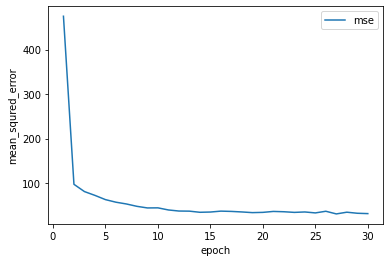

In [15]:
# MSE 학습 그래프
import matplotlib.pyplot as plt

plt.plot(epoch, mse, label='mse')
plt.xlabel('epoch')
plt.ylabel('mean_squred_error')
plt.legend()
plt.show()

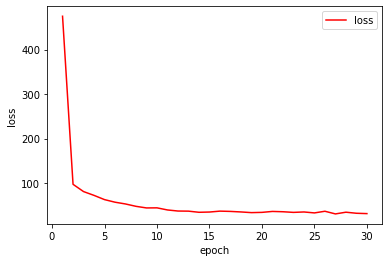

In [16]:
# 손실 학습 그래프
import matplotlib.pyplot as plt

plt.plot(epoch, loss, 'r', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
# 실제값, 예측값 데이터 프레임 생성
pred_y = model.predict(X_te).flatten() 
print(pred_y)

[14.926858  17.68186   26.267515   7.917684  15.005158  20.33469
 11.632039  22.128693  13.236667   7.889089   5.1158195  9.61797
 10.792668   2.5619862 33.263203  22.72695   13.689984  29.558794
 24.675909  21.299322  22.893751  17.08631   16.023733  26.365967
 21.479921  10.689122  17.379736  11.004315  28.346972  15.011754
 10.714337  12.856969  17.735548  20.255527  24.8231    12.98763
  4.140386  16.951506   6.4117637  6.4219794 22.591516  18.943966
 12.94563    9.773442  17.00797   23.849703  16.26448   14.620755
  7.636907  20.454527   7.7502265 11.073209  18.992067  22.401669
  7.765287  15.407378  17.322477  10.0682535 14.971913  18.075153
 16.16294   18.721216  24.99944   24.195602   9.034825  24.184431
 11.682729  13.96901    8.437734  20.76813   15.780751  17.59316
 26.882368  23.865847  16.954939  -1.2630564 27.121996  20.394733
 23.056791  16.387403  22.719763  17.167486  14.822988  28.526918
 28.235516  21.92799   20.246086   4.790792  24.334208   9.029683
  9.72614    4

In [18]:
import pandas as pd

res_df = pd.DataFrame(pred_y, columns=['predict_val'])
res_df['real_val'] = y_te

In [19]:
res_df.head(3)

,predict_val,real_val
0,14.926858,22.6
1,17.681860,50.0
2,26.267515,23.0


In [20]:
df_sort = res_df.sort_values(["predict_val"], 
                             ascending=True)

In [21]:
df_sort.head(3)

,predict_val,real_val
116,-3.866297,8.4
96,-3.027385,13.8
75,-1.263056,7.4


In [22]:
len(df_sort)

127

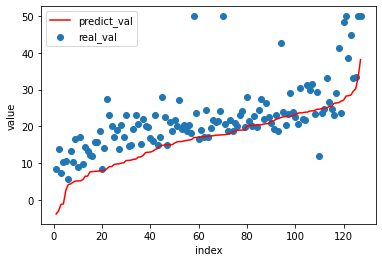

In [23]:
# 예측값 실제값 그래프
import matplotlib.pyplot as plt
import numpy as np

idx = np.arange(1,len(df_sort)+1)
plt.scatter(idx, df_sort['real_val'], 
            marker='o', 
            label='real_val')
plt.plot(idx, df_sort['predict_val'], 
         color='r', 
         label='predict_val')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

# 통합 코드

(506, 13)
{5.0, 6.3, 7.2, 8.8, 7.4, 10.2, 11.8, 12.7, 13.6, 14.5, 15.0, 16.5, 17.5, 18.9, 18.2, 20.4, 21.6, 22.9, 21.7, 24.0, 19.9, 26.6, 26.5, 27.5, 23.1, 27.1, 28.7, 24.7, 30.8, 33.4, 34.7, 34.9, 36.2, 35.4, 31.6, 33.0, 38.7, 33.2, 43.8, 41.3, 37.2, 39.8, 42.3, 48.5, 44.8, 50.0, 46.7, 48.3, 44.0, 48.8, 46.0, 10.5, 11.5, 11.0, 12.5, 12.0, 13.5, 13.0, 14.0, 16.6, 16.0, 16.1, 16.4, 17.4, 17.1, 17.0, 17.6, 17.9, 18.4, 18.6, 18.5, 18.0, 18.1, 19.6, 19.4, 19.5, 19.1, 19.0, 20.0, 20.5, 20.9, 20.6, 20.1, 21.0, 21.4, 21.5, 21.9, 21.1, 22.0, 22.5, 22.6, 22.4, 22.1, 23.4, 23.5, 23.9, 23.6, 23.0, 24.1, 24.6, 24.4, 24.5, 25.0, 25.1, 26.4, 27.0, 27.9, 28.0, 28.4, 28.1, 28.5, 28.6, 29.4, 29.9, 29.6, 29.1, 29.0, 30.5, 30.1, 31.1, 31.5, 31.0, 32.5, 32.0, 32.9, 32.4, 32.2, 33.3, 33.8, 33.1, 32.7, 8.4, 34.6, 35.2, 35.1, 10.4, 10.9, 7.0, 36.4, 36.0, 36.5, 36.1, 11.9, 37.9, 37.0, 37.6, 37.3, 13.9, 13.4, 14.4, 14.9, 15.4, 8.5, 41.7, 42.8, 43.1, 43.5, 45.4, 9.5, 8.3, 8.7, 9.7, 10.8, 11.3, 11.7, 12.3, 12.8,

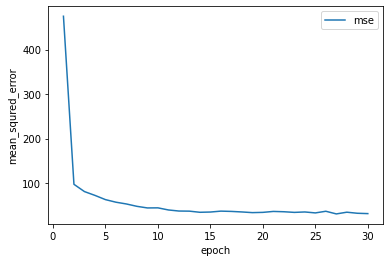

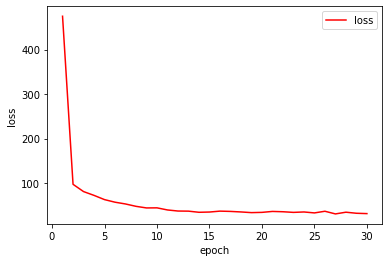

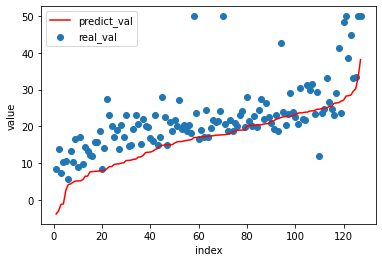

In [24]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
import pandas as pd

# 랜덤 시드 설정
np.random.seed(0)
tf.random.set_seed(0)

# 데이터 불러오기
raw_boston = datasets.load_boston()

# 피쳐, 타겟 데이터 지정
X = raw_boston.data
y = raw_boston.target

# 피쳐 데이터 차원 확인
print(X.shape)

# 타겟 데이터 종류 확인
print(set(y))

# 트레이닝/테스트 데이터 분할
X_tn, X_te, y_tn, y_te=train_test_split(X, y, random_state=0)

# 신경망 생성
n_feat = X_tn.shape[1]
epo = 30

model = Sequential()
model.add(Dense(20, input_dim=n_feat, activation='relu'))
model.add(Dense(1))

# 모형 컴파일
model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['mean_squared_error'])

# 신경망 학습
hist = model.fit(X_tn, y_tn, epochs=epo, batch_size=5)

# 트레이닝 데이터 평가
print(model.evaluate(X_tn, y_tn)[1])

# 테스트 데이터 평가
print(model.evaluate(X_te, y_te)[1])

epoch = np.arange(1,epo+1)
mse = hist.history['mean_squared_error'] 
loss = hist.history['loss'] 

# MSE 학습 그래프
plt.plot(epoch, mse, label='mse')
plt.xlabel('epoch')
plt.ylabel('mean_squred_error')
plt.legend()
plt.show()

# 손실 학습 그래프
plt.plot(epoch, loss, 'r', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# 실제값, 예측값 데이터 프레임 생성
pred_y = model.predict(X_te).flatten() 
res_df = pd.DataFrame(pred_y, columns=['predict_val'])
res_df['real_val'] = y_te
df_sort = res_df.sort_values(["predict_val"], 
                             ascending=True)

# 예측값 실제값 그래프
idx = np.arange(1,len(df_sort)+1)
plt.scatter(idx, df_sort['real_val'], 
            marker='o', 
            label='real_val')
plt.plot(idx, df_sort['predict_val'], 
         color='r',
         label='predict_val')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()